# Review of Principal Component Analysis

PCA is a popular dimensionality reduction technique. It achieves this by
    1. Identifying the direction to project the points on to such that the plane on which the points are project maximizes the variance of the points along the plane
    2. Repeating step 1. for each subsequent plane (called principal component) such that each subsequent plane is orthogonal to all previous planes.

Each principal component become the linear combination of the original dimensions. An extreme case is where two dimensions x1 and x2 that are identical (i.e. x1 = x2). PCA will collapse x1 and x2 into a single dimension, x, that exist in a lower-dimensional space (namely, from 2-d to 1d)

## Things to note:

* It is good practice to [scale the features before applying PCA](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca). In the iris dataset, all the measurement are in centimeters, so this is not necassary
* PCA performs poorly when the data contains outliers
    * https://stats.stackexchange.com/questions/378751/why-is-pca-sensitive-to-outliers

In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset

In [2]:
iris = datasets.load_iris()
 
# Load into a pandas dataframe since most workflow 
# begins with a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Initialize and fit the PCA class from Sklearn

Choose 2 principal components (PC) for easier visualization. The number of PCs can be reduced if only a small subset of the original number of PC explains most (>90%) of the variation.

In [3]:
NUM_PC = 2
pca = decomposition.PCA(n_components=NUM_PC)
pca.fit(df)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA Diagnostic
* Explained variation plot
    * Identify marginal contribution of each PC
* PC component plot
    * Identify most important features in each PC

In [4]:
# Explained variance ratio
# Quantifies the amount of variation that each principal component
# The share of the total variation explained by each PC

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.22824171 0.24267075]
[0.92461872 0.05306648]


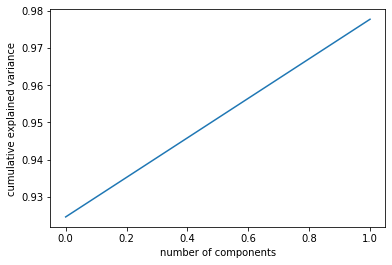

In [5]:
# Cumulative share of explained variation to identify
# marginal contribution of each PC
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0.5, 0, 'number of components')

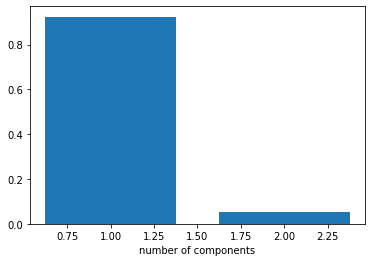

In [6]:
# Plot the explained variance ratio for each PC
x = [i for i in range(1, NUM_PC+1)]
h = list(pca.explained_variance_ratio_)
plt.bar(x=x, height=h, width=0.75)
plt.xlabel('number of components')

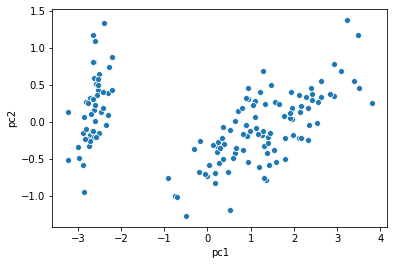

In [7]:
if NUM_PC == 2:
    d = pca.transform(df)
    sns.scatterplot(x=d[:, 0], y=d[:, 1])
    plt.xlabel('pc1')
    plt.ylabel('pc2');

In [10]:
def top_feats(df, pca, m=3):
    '''Print out the top m features for each principal component'''
    assert m <= len(df.columns)
    feats = df.columns.tolist()

    for i, pc in enumerate(pca.components_):
        zz = list(zip(feats, pc))
        zzs = sorted(zz, key=lambda tup: abs(tup[1]), reverse=True)
        print(f"Pca: {i}")
        display(pd.DataFrame(zzs[0:m]))
        
top_feats(df, pca, m=3)

Pca: 0


,0,1
0,petal length (cm),0.856671
1,sepal length (cm),0.361387
2,petal width (cm),0.358289


Pca: 1


,0,1
0,sepal width (cm),0.730161
1,sepal length (cm),0.656589
2,petal length (cm),-0.173373


# Simple Pipeline implementing PCA from end-to-end